# Second Hand Car Price ML Modeling

## Subject

Data source:
https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression/code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_integer_dtype
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import random

# 1. Data cleaning

In [2]:
dataset_raw = pd.read_csv('../data/train.csv')
dataset_raw.drop(['v.id'],inplace=True,axis=1)
dataset_raw.sample(5)

,onRoadOld,onRoadNow,years,km,rating,condition,economy,topSpeed,horsePower,torque,currentPrice
669,637691,717652,2,98880,2,3,11,195,60,71,282496.5
729,563396,793145,4,56387,4,6,8,173,64,133,456827.5
488,664315,810730,2,132059,2,8,13,150,87,87,225917.0
425,558107,798353,3,59619,1,3,15,142,120,93,440044.5
622,598876,819161,6,100630,3,9,8,166,76,138,332478.5


In [3]:
# check duplicated data
dataset_raw.duplicated().sum()

0

In [4]:
# check for missing data, no missing data
dataset_raw.isnull().sum()/dataset_raw.shape[0]

onRoadOld       0.0
onRoadNow       0.0
years           0.0
km              0.0
rating          0.0
condition       0.0
economy         0.0
topSpeed        0.0
horsePower      0.0
torque          0.0
currentPrice    0.0
dtype: float64

# 2. DEA

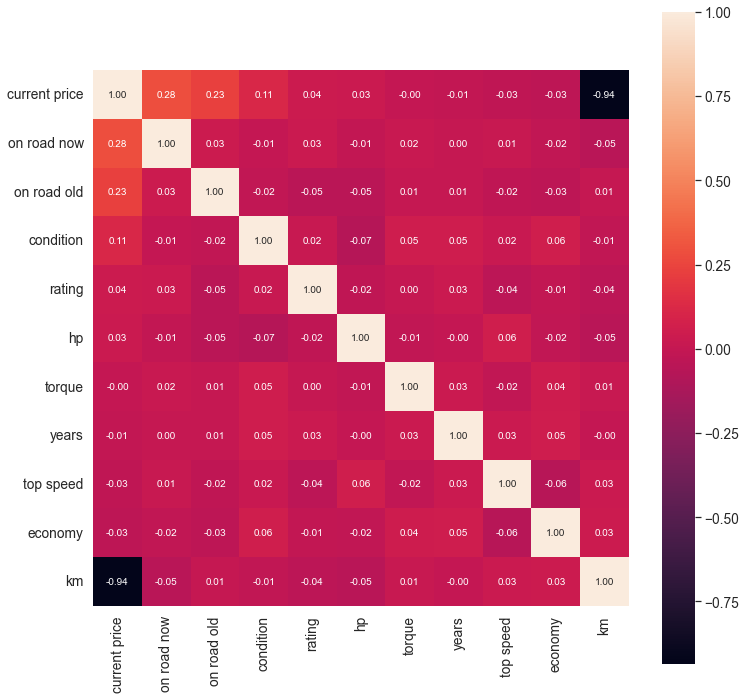

In [3]:
corr=dataset_raw.corr()
corr_cols_ordered=corr['current price'].sort_values(ascending=False).index
corr=dataset_raw.loc[:,corr_cols_ordered].corr()

plt.figure(figsize=(12,12))
sns.set(font_scale=1.25)
sns.heatmap(corr,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10})
plt.show()

In [30]:
dataset_raw.dtypes

on road old        int64
on road now        int64
years              int64
km                 int64
rating             int64
condition          int64
economy            int64
top speed          int64
hp                 int64
torque             int64
current price    float64
dtype: object

In [37]:
is_numeric_dtype(dataset_raw['years'])

True

In [40]:
is_integer_dtype(dataset_raw['years'])

True

In [49]:
a=1
if is_integer_dtype(dataset_raw['years']) and (0<a<2):
    print('True')
else:
    print('False')

True


In [ ]:
if 10000 <= number <= 30000:
    pass

on road old min value is: 500265, max value is: 699859


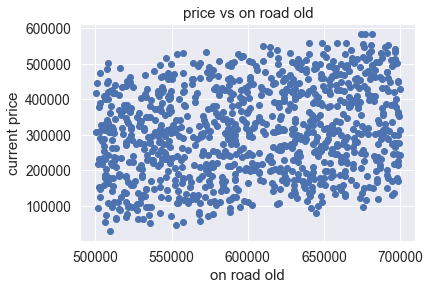

In [18]:
print('on road old min value is: {}, max value is: {}'.
      format(dataset_raw['on road old'].min(),dataset_raw['on road old'].max()))
plt.scatter(x=dataset_raw['on road old'],y=dataset_raw['current price'])
plt.xlabel('on road old')
plt.ylabel('current price')
plt.title('price vs on road old')
plt.show()

on road now min value is: 700018, max value is: 899797


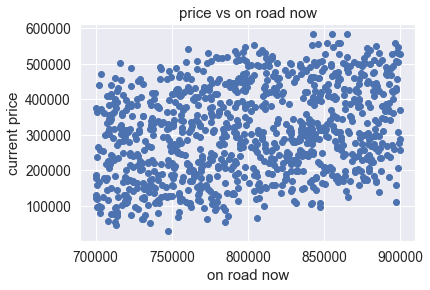

In [19]:
print('on road now min value is: {}, max value is: {}'.
      format(dataset_raw['on road now'].min(),dataset_raw['on road now'].max()))
plt.scatter(x=dataset_raw['on road now'],y=dataset_raw['current price'])
plt.xlabel('on road now')
plt.ylabel('current price')
plt.title('price vs on road now')
plt.show()

torque min value is: 68, max value is: 140


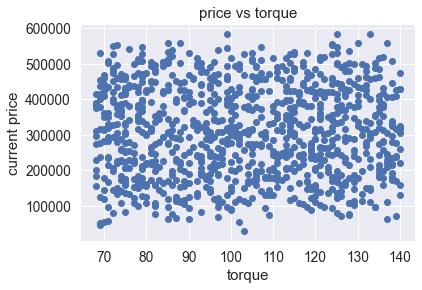

In [21]:
print('torque min value is: {}, max value is: {}'.
      format(dataset_raw['torque'].min(),dataset_raw['torque'].max()))
plt.scatter(x=dataset_raw['torque'],y=dataset_raw['current price'])
plt.xlabel('torque')
plt.ylabel('current price')
plt.title('price vs torque')
plt.show()

hp min value is: 50, max value is: 120


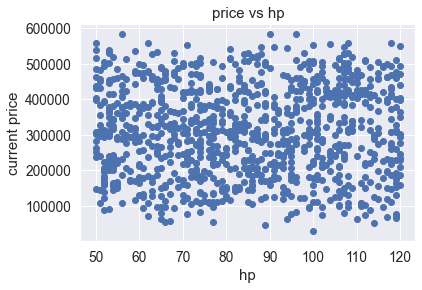

In [22]:
print('hp min value is: {}, max value is: {}'.
      format(dataset_raw['hp'].min(),dataset_raw['hp'].max()))
plt.scatter(x=dataset_raw['hp'],y=dataset_raw['current price'])
plt.xlabel('hp')
plt.ylabel('current price')
plt.title('price vs hp')
plt.show()

top speed min value is: 135, max value is: 200


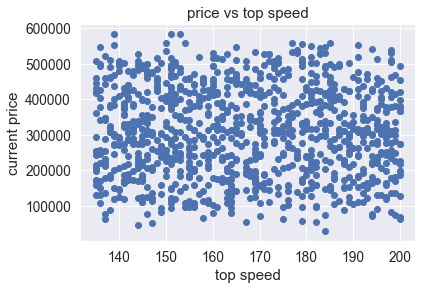

In [24]:
print('top speed min value is: {}, max value is: {}'.
      format(dataset_raw['top speed'].min(),dataset_raw['top speed'].max()))
plt.scatter(x=dataset_raw['top speed'],y=dataset_raw['current price'])
plt.xlabel('top speed')
plt.ylabel('current price')
plt.title('price vs top speed')
plt.show()

km min value is: 50324, max value is: 149902


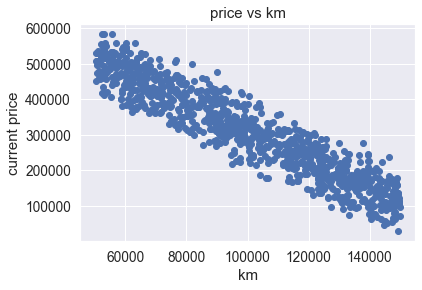

In [26]:
print('km min value is: {}, max value is: {}'.
      format(dataset_raw['km'].min(),dataset_raw['km'].max()))
plt.scatter(x=dataset_raw['km'],y=dataset_raw['current price'])
plt.xlabel('km')
plt.ylabel('current price')
plt.title('price vs km')
plt.show()

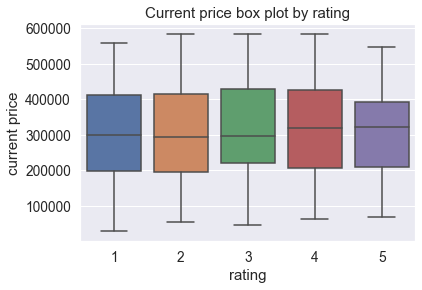

In [16]:
sns.boxplot(data=dataset_raw, x='rating', y='current price')
plt.title('Current price box plot by rating')
plt.show()

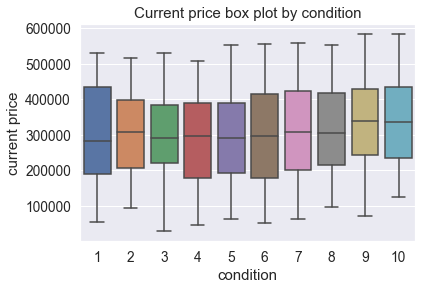

In [17]:
sns.boxplot(data=dataset_raw, x='condition', y='current price')
plt.title('Current price box plot by condition')
plt.show()

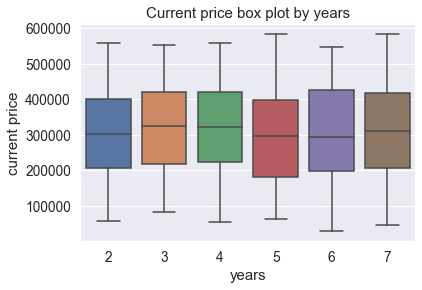

In [27]:
sns.boxplot(data=dataset_raw, x='years', y='current price')
plt.title('Current price box plot by years')
plt.show()

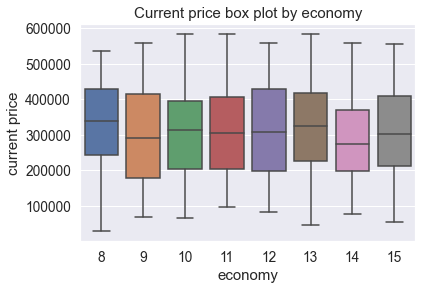

In [28]:
sns.boxplot(data=dataset_raw, x='economy', y='current price')
plt.title('Current price box plot by economy')
plt.show()

**Set the following value range for each column:**
- **on road old**   [400000, 800000]
- **on road now**   [600000,1000000]
- **years**  [0,10]
- **km**  [0, 200000]
- **rating**   [range(1,6)]
- **condition**  [range(1,11)]
- **economy**  [range(5,21)]
- **top speed**  [120, 250]
- **hp**  [40, 140]
- **torque**  [50, 160]


# 3. Split data

We have data set with 1000 samples. The data will be split in to a main data set (90%) for machine learning modeling, and the samll data set (10%) for future data injection. 

In [5]:
df,df_inj=train_test_split(dataset_raw,test_size=0.1,random_state=1)

In [6]:
df_inj.shape

(100, 11)

In [7]:
# modify the df_inj data frame (to create some unqualified data)
# update randomly 10 cells in the df_inj dataframe
for i in range(10):
    col = random.randint(0,11)
    row = random.randint(0,100)
    df_inj.iloc[row,col] = 'noise'

In [8]:
# devide the df_inj into 10 files
for i in range(1,11):
    df_sub = df_inj.iloc[(i-1)*10:i*10,:]
    filename = '../data/folder_A/df_'+str(i)+'.csv'
    df_sub.to_csv(filename)
    

In [10]:
os.makedirs('../data/model',exist_ok=True)
df.to_csv('../data/model/df.csv')

In [15]:
# some manipulation to the df_inj data after

# 4. Train Test Split

In [6]:
df.sample(5)

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
835,592383,826939,3,116569,4,5,10,189,107,117,245594.5
407,647221,850294,3,147460,5,2,12,152,70,80,160597.5
890,533774,870736,6,70261,5,7,14,188,99,119,427590.0
999,590105,779743,5,67295,4,2,8,199,99,96,414938.5
648,634647,794081,2,105836,1,4,12,175,68,133,291776.5


In [9]:
y=df[['current price']]
X=df.iloc[:,:-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# 5. Feature Engineering

## 5.1 Standardization

In [11]:
ss=StandardScaler()
ss.fit(X_train)
X_train_ss=ss.transform(X_train)
X_test_ss=ss.transform(X_test)

# 6. Modeling and Evaluation

## 6.1 Linear Regression

In [13]:
lr=LinearRegression()
lr.fit(X_train_ss,y_train)
y_pred=pd.DataFrame(lr.predict(X_test_ss),columns=['current price'])
print('Linear model evaluation result with standard scaled X:')
print('- r2 score: ', r2_score(y_test,y_pred))

Linear model evaluation result with standard scaled X:
- r2 score:  0.9960985714840908


In [12]:
sorted(df.columns.tolist()) == sorted(['on road now', 'on road old', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'])

True